In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('launch_dataset_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,6,2010-06-04,Falcon 9,0.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1
1,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,1
2,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,1
3,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,1


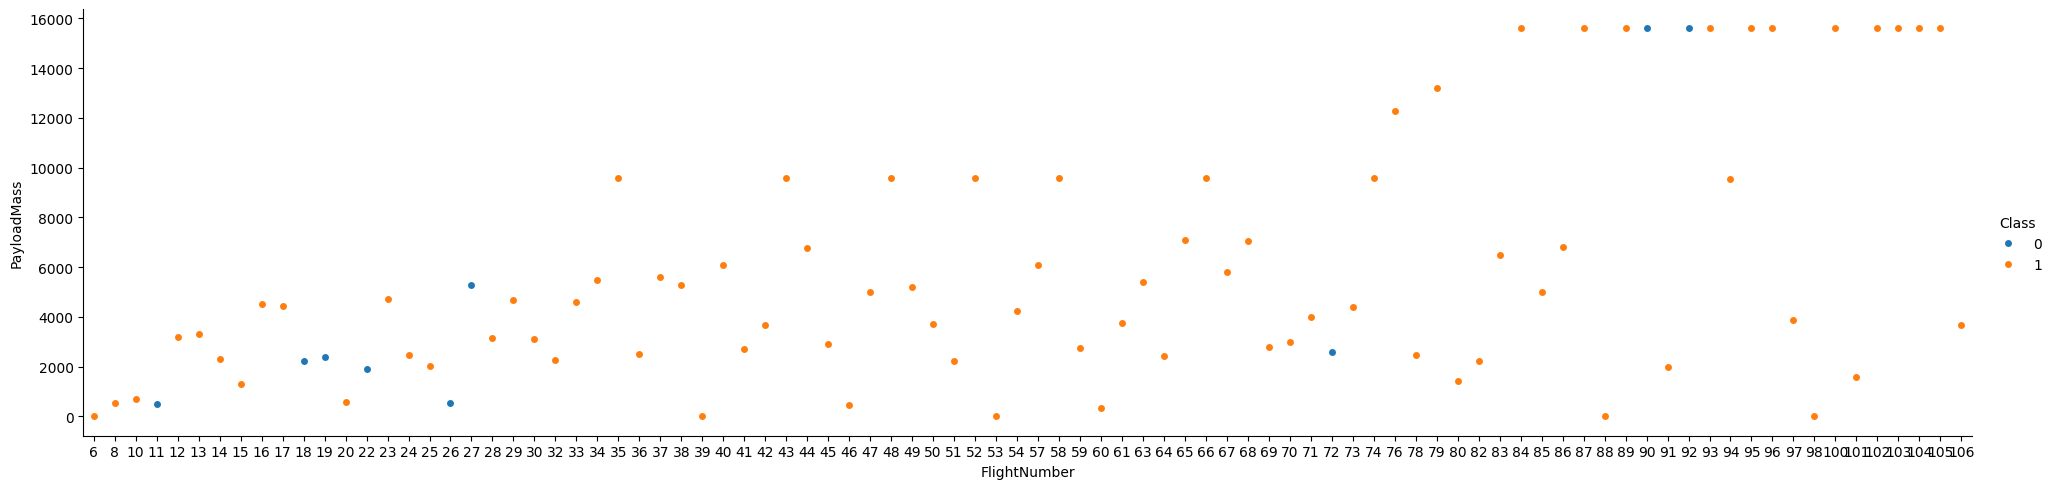

In [7]:
sns.catplot(
    x='FlightNumber',
    y='PayloadMass',
    hue='Class',
    data=df,
    aspect=4
)

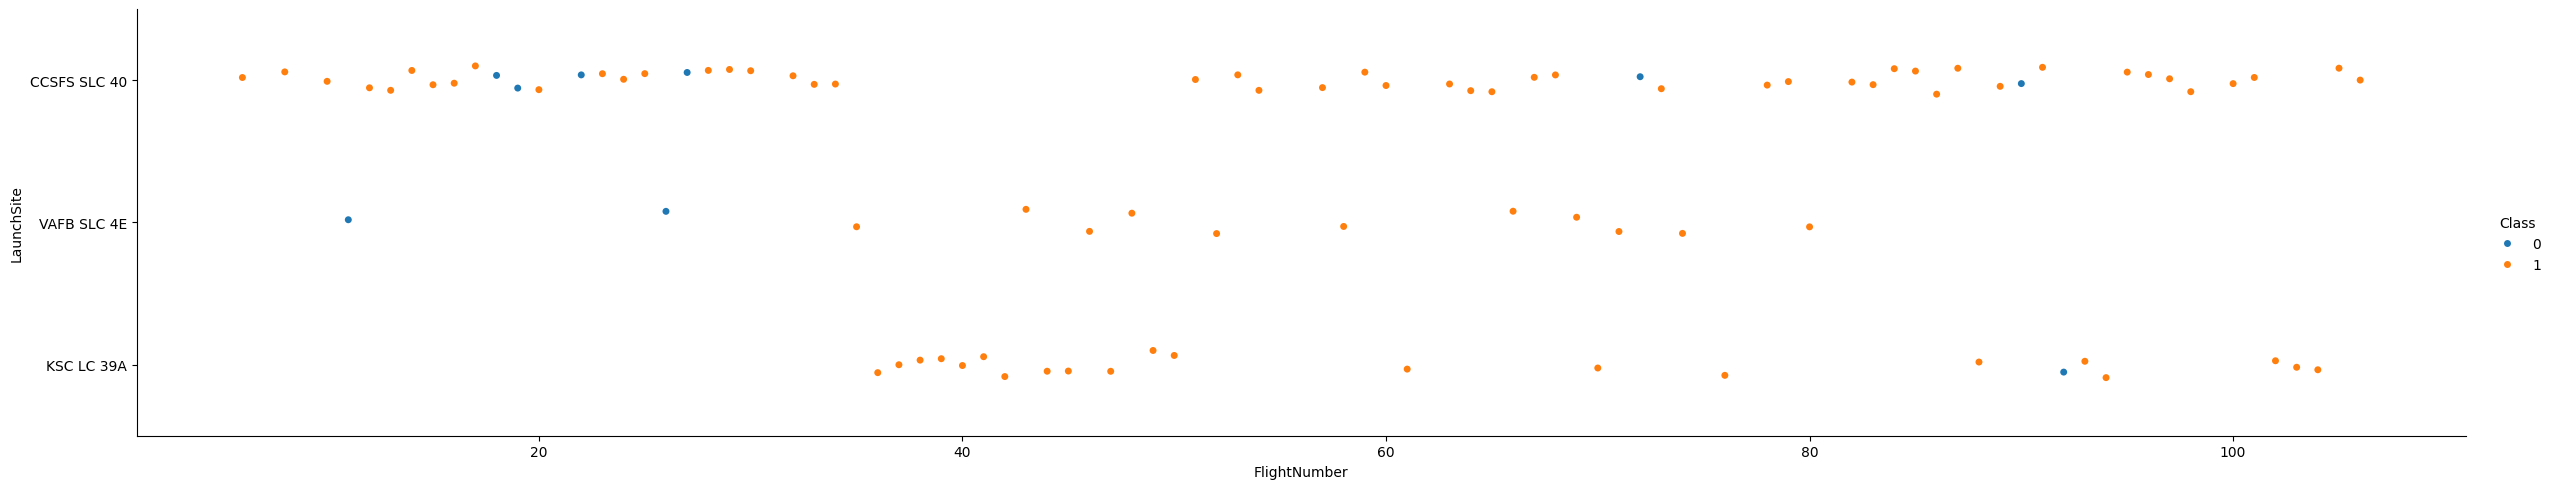

In [9]:
sns.catplot(
    x='FlightNumber',
    y='LaunchSite',
    hue='Class',
    data=df,
    aspect=5
)

<Axes: xlabel='FlightNumber', ylabel='LaunchSite'>

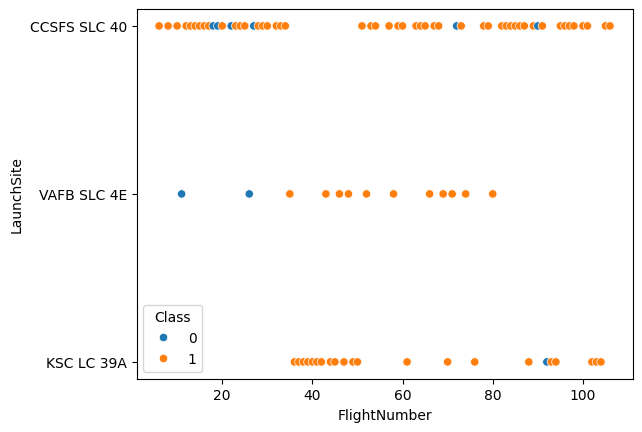

In [11]:
sns.scatterplot(
    x='FlightNumber',
    y='LaunchSite',
    hue='Class',
    data=df
)

<Axes: xlabel='PayloadMass', ylabel='LaunchSite'>

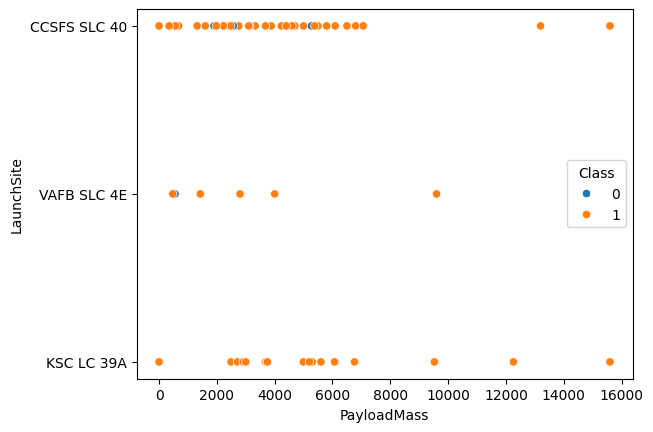

In [12]:
sns.scatterplot(
    x='PayloadMass',
    y='LaunchSite',
    hue='Class',
    data=df
)

<Axes: xlabel='Orbit', ylabel='Class'>

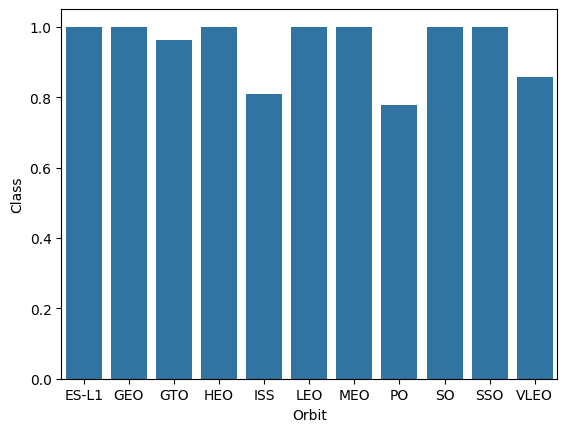

In [21]:
success_rate_orbit = df.groupby('Orbit')['Class'].mean()
sns.barplot(
    success_rate_orbit
)

<Axes: xlabel='FlightNumber', ylabel='Orbit'>

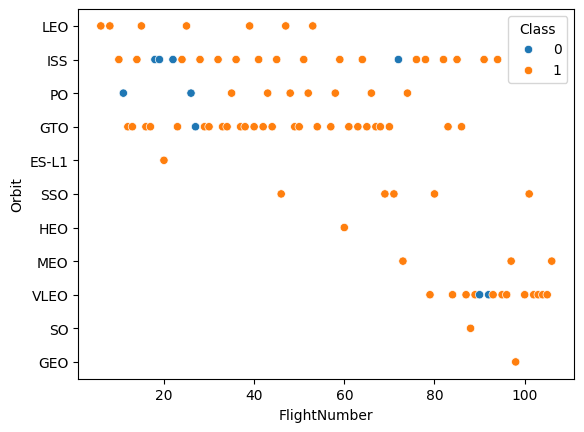

In [22]:
sns.scatterplot(
    data=df,
    x='FlightNumber',
    y='Orbit',
    hue='Class'
)

<Axes: xlabel='PayloadMass', ylabel='Orbit'>

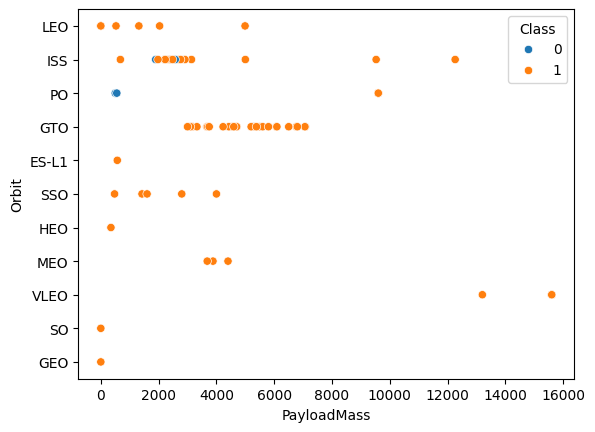

In [25]:
sns.scatterplot(
    x='PayloadMass',
    y='Orbit',
    hue='Class',
    data=df
)

In [31]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

<Axes: xlabel='Year', ylabel='Class'>

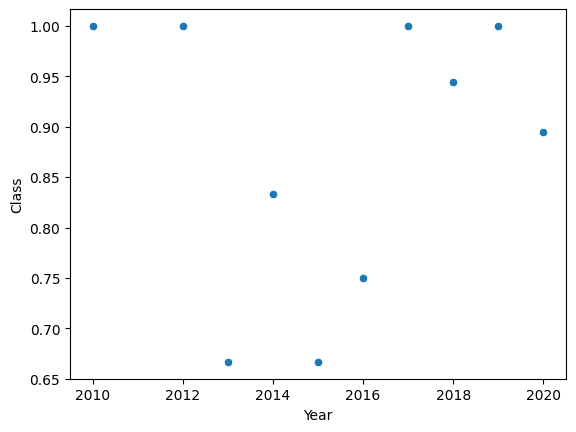

In [36]:
success_rate_year = df.groupby('Year')['Class'].mean()

sns.scatterplot(
    data=success_rate_year
)

In [40]:
cols = ['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']
features = df[cols]
features_one_hot = pd.get_dummies(features).astype('float')

In [42]:
features_one_hot.to_csv('launch_dataset_3.csv', index=False)

In [44]:
features_one_hot.columns.size

80